# California Housing Challenge

The notebook is intened to predict the average house value upon the provided features

In [34]:
# Importing standard libraries
import pandas as pd
import numpy as np

from scipy.stats import zscore

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [3]:
# Define Seaborn theme parameters
theme_parameters =  {
    'axes.spines.right': False,
    'axes.spines.top': False,
    'grid.alpha':0.3,
    'axes.titlesize': 18,
    'figure.figsize': (14, 6),
}

# Set the theme
sns.set_theme(style='whitegrid',
              palette=sns.color_palette('colorblind'), 
              rc=theme_parameters)

## Read data

In [4]:
# Read treaning data
df_train = pd.read_csv('./../data/california_housing_train.csv')

In [5]:
df_train.head()

,id,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,0,2.3859,15.0,3.827160,1.112100,1280.0,2.486989,34.60,-120.12,0.980
1,1,3.7188,17.0,6.013373,1.054217,1504.0,3.813084,38.69,-121.22,0.946
2,2,4.7750,27.0,6.535604,1.103175,1061.0,2.464602,34.71,-120.45,1.576
3,3,2.4138,16.0,3.350203,0.965432,1255.0,2.089286,32.66,-117.09,1.336
4,4,3.7500,52.0,4.284404,1.069246,1793.0,1.604790,37.80,-122.41,4.500


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37137 entries, 0 to 37136
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           37137 non-null  int64  
 1   MedInc       37137 non-null  float64
 2   HouseAge     37137 non-null  float64
 3   AveRooms     37137 non-null  float64
 4   AveBedrms    37137 non-null  float64
 5   Population   37137 non-null  float64
 6   AveOccup     37137 non-null  float64
 7   Latitude     37137 non-null  float64
 8   Longitude    37137 non-null  float64
 9   MedHouseVal  37137 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 2.8 MB


In [7]:
df_train.describe()

,id,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,37137.00000,37137.000000,37137.000000,37137.000000,37137.000000,37137.000000,37137.000000,37137.000000,37137.000000,37137.000000
mean,18568.00000,3.851029,26.057005,5.163124,1.062204,1660.778919,2.831243,35.570030,-119.554329,2.079751
std,10720.67281,1.803167,12.158221,1.206242,0.096490,1302.469608,2.702413,2.083179,1.974028,1.158571
min,0.00000,0.499900,2.000000,0.851064,0.500000,3.000000,0.950000,32.550000,-124.350000,0.149990
25%,9284.00000,2.602300,17.000000,4.357522,1.020305,952.000000,2.394495,33.930000,-121.800000,1.208000
50%,18568.00000,3.515600,25.000000,5.068611,1.054545,1383.000000,2.744828,34.190000,-118.450000,1.808000
75%,27852.00000,4.699700,35.000000,5.858597,1.088825,1856.000000,3.125313,37.700000,-118.020000,2.660000
max,37136.00000,15.000100,52.000000,28.837607,5.873181,35682.000000,502.990610,41.950000,-114.550000,5.000010


## Eploratory data analysis -EDA

### Exploratory pairplot

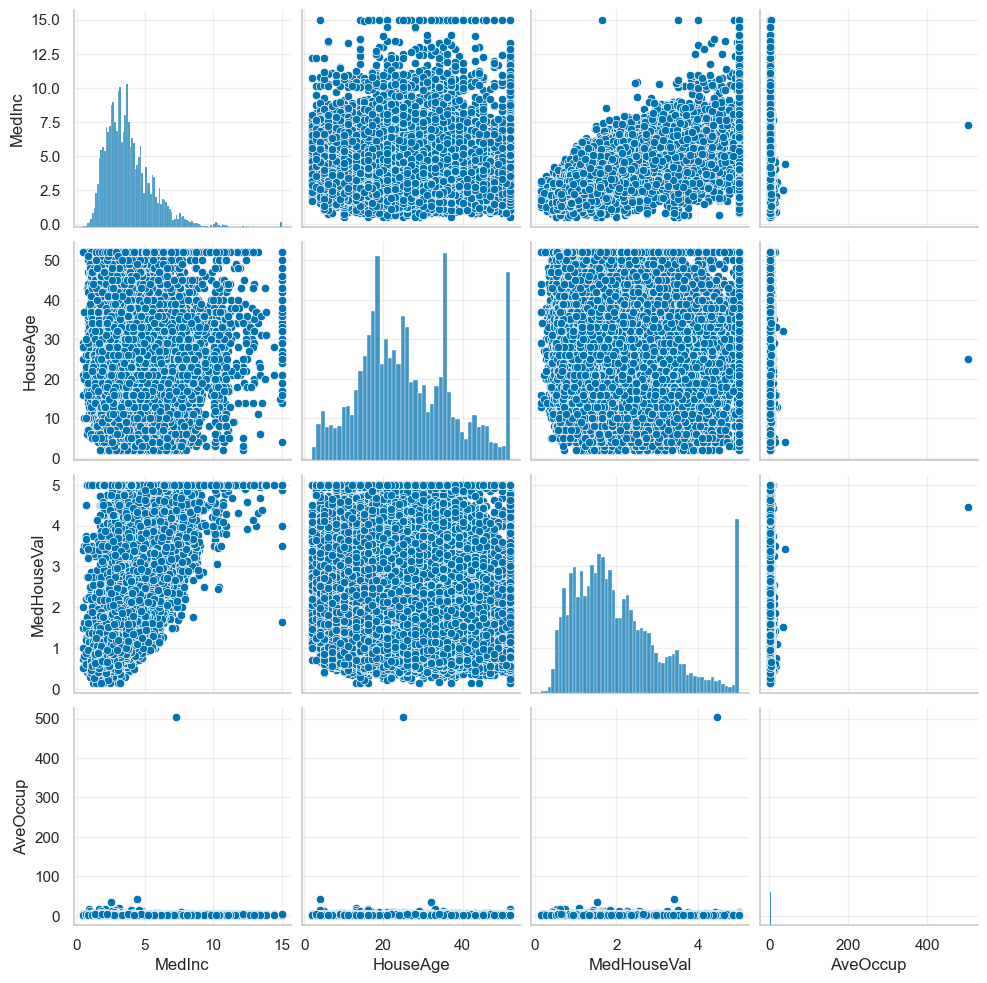

In [8]:
# plotting a pairplot to have a look at the data
ax = sns.pairplot(df_train, 
                  vars=['MedInc', 'HouseAge', 'MedHouseVal', 'AveOccup'])

plt.show()

### Median income distribution

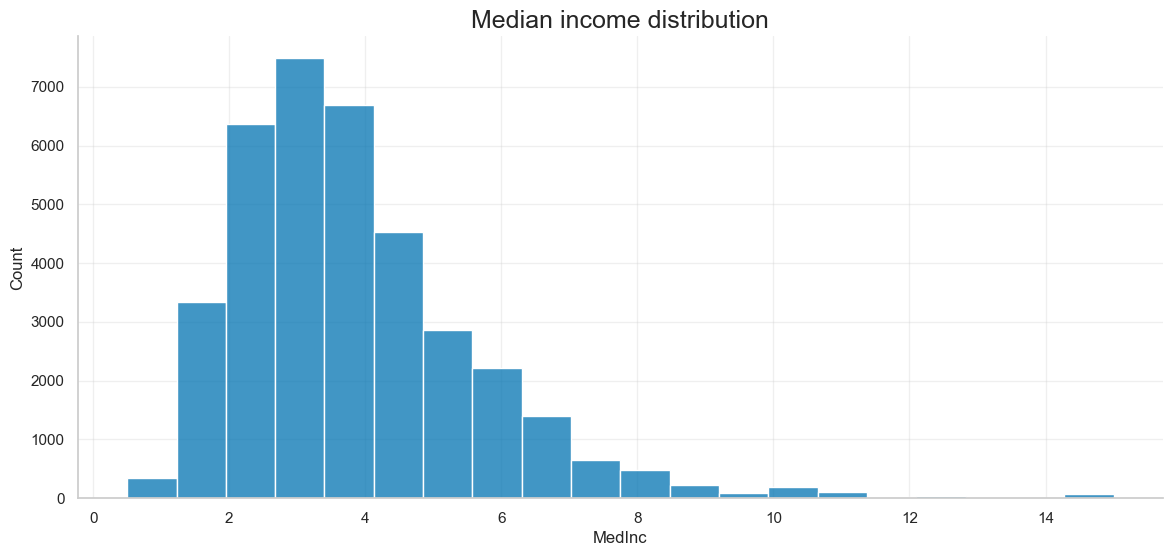

In [9]:
# median income (MedInc) distribution
ax = sns.histplot(df_train, x = 'MedInc', bins = 20)

ax.set_title('Median income distribution')

plt.show()

### House value per median income

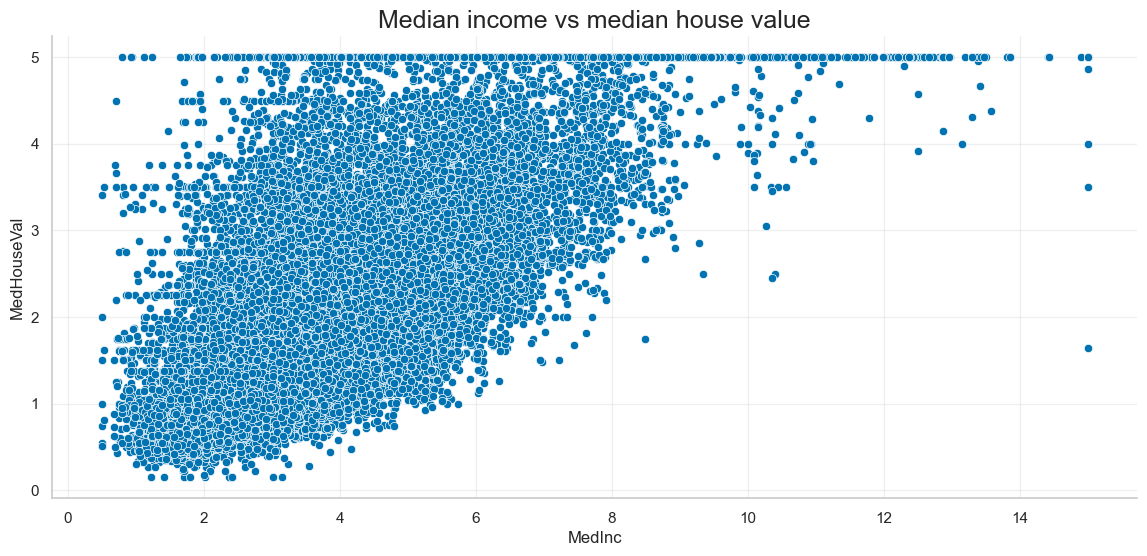

In [10]:
# scatter plot with median income and median house value (MedHouseVal)
ax = sns.scatterplot(df_train,
            x = 'MedInc',
            y = 'MedHouseVal')

ax.set_title('Median income vs median house value')

plt.show()

By the plot the data looks capped, I'll verify this hypotesis looking at the max value of median house value

In [11]:
# are there >5 mil value houses?
df_train['MedHouseVal'].max()

5.00001

In [12]:
df_train['MedHouseVal'].value_counts().sort_values(ascending=False).head(5)

5.00001    1827
1.62500     215
1.37500     194
1.12500     171
1.87500     169
Name: MedHouseVal, dtype: int64

Data is capped at 5.00001 mil

### Average occupancy distribution

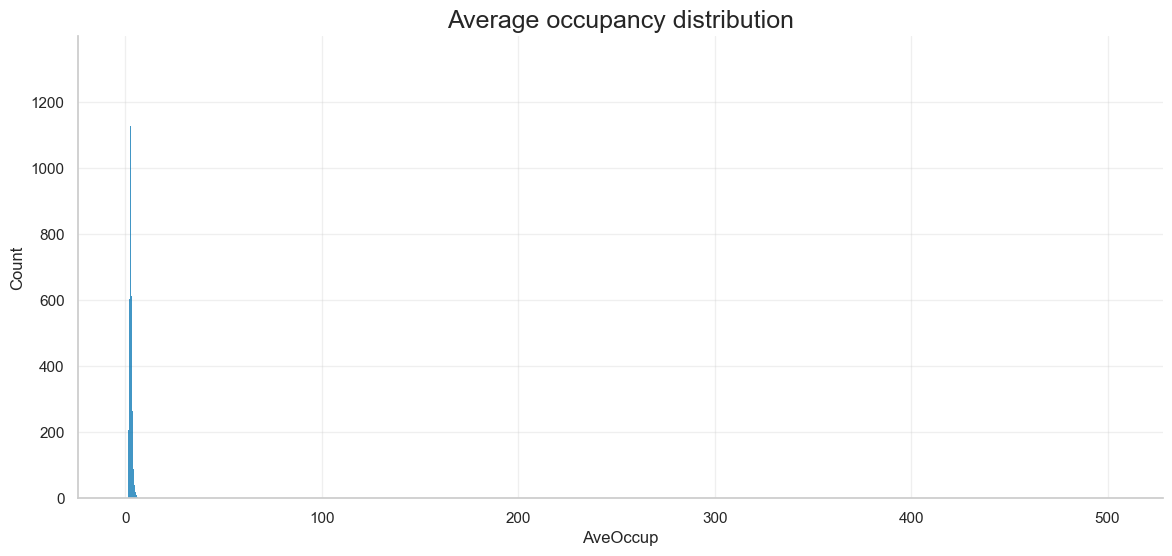

In [13]:
# hist plot of MedHouseVal
ax = sns.histplot(df_train, x='AveOccup')

ax.set_title('Average occupancy distribution')

plt.show()

In [14]:
df_train['AveOccup'].describe()

count    37137.000000
mean         2.831243
std          2.702413
min          0.950000
25%          2.394495
50%          2.744828
75%          3.125313
max        502.990610
Name: AveOccup, dtype: float64

In [15]:
df_train['AveOccup'].value_counts().sort_index(ascending=False).head(5)

502.990610    1
41.214286     1
33.987712     1
18.821818     1
16.117647     1
Name: AveOccup, dtype: int64

The 'AveOccup' column has some outliers that must be dropped

In [5]:
# Dropping the outliers
df_train = df_train[df_train['AveOccup'] < 40].reset_index()

In [17]:
df_train['AveOccup'].describe()

count    37135.000000
mean         2.816741
std          0.725863
min          0.950000
25%          2.394480
50%          2.744828
75%          3.125066
max         33.987712
Name: AveOccup, dtype: float64

In [18]:
df_train['AveOccup'].value_counts().sort_index(ascending=False).head(5)

33.987712    1
18.821818    1
16.117647    1
16.091954    1
15.812155    1
Name: AveOccup, dtype: int64

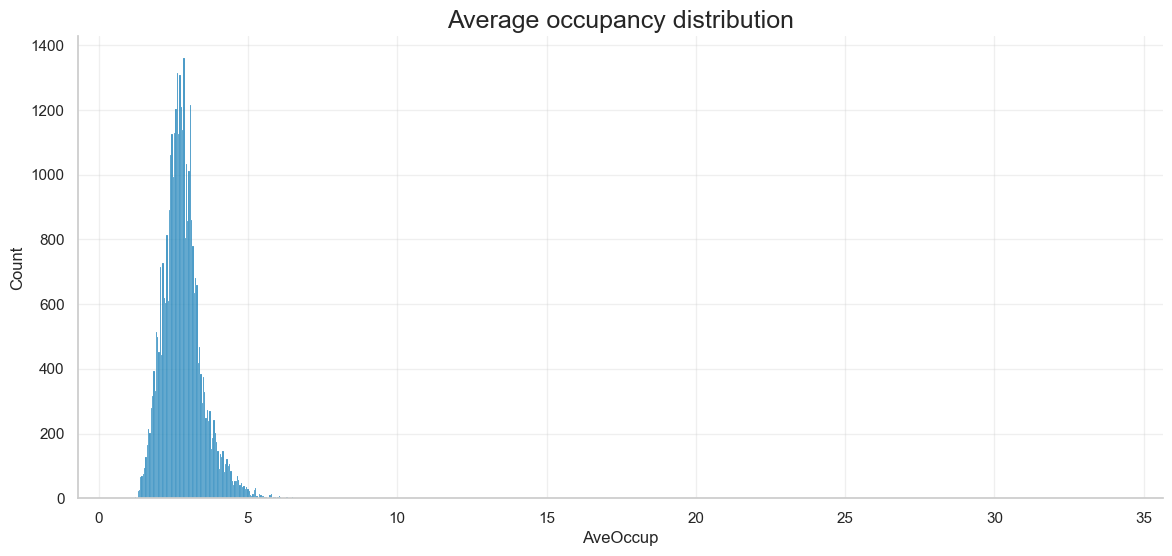

In [19]:
# updated hist plot of MedHouseVal
ax = sns.histplot(df_train, x='AveOccup')

ax.set_title('Average occupancy distribution')

plt.show()

Data is still strongly right-skewed

### Median house value distribution

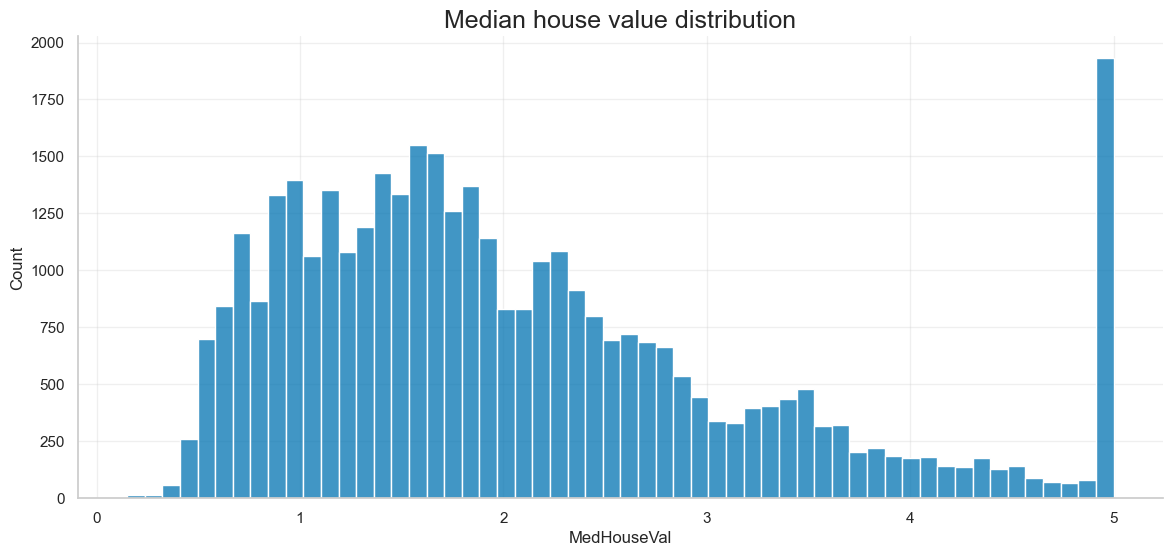

In [20]:
# hist plot pf MedHouseVal
ax = sns.histplot(df_train, x='MedHouseVal')

ax.set_title('Median house value distribution')

plt.show()

In [21]:
df_train['MedHouseVal'].value_counts().sort_index(ascending=False).head(5)

5.00001    1827
5.00000      46
4.99100       2
4.99000       1
4.98800       1
Name: MedHouseVal, dtype: int64

### Correlation matrix

In [22]:
# Generate correlation matrix
correlation_train = pd.DataFrame.corr(df_train, method='pearson')

In [23]:
# Generate a mask for the upper triangle
correlation_mask = np.triu(np.ones_like(correlation_train, dtype=bool))

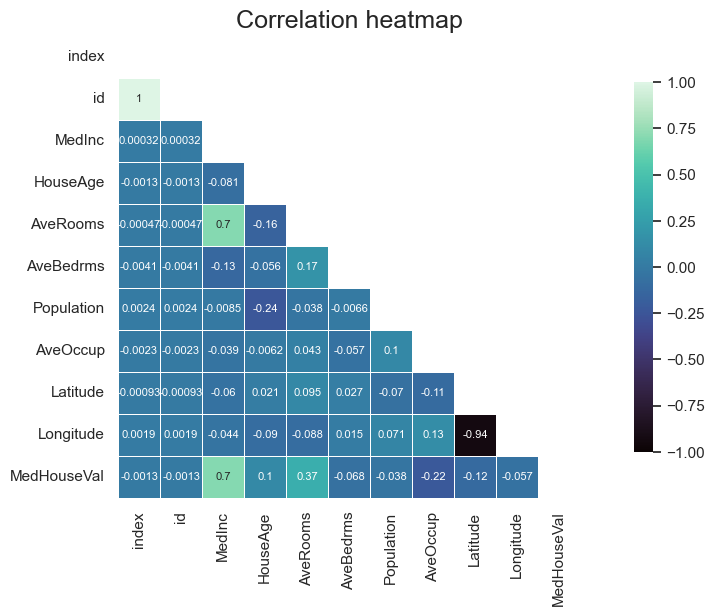

In [24]:
ax = sns.heatmap(correlation_train, 
            mask=correlation_mask, 
            cmap='mako',
            vmax=1.0, 
            vmin=-1.0, 
            center=0, 
            square=True, 
            linewidths=.5, 
            annot=True,
            annot_kws={'fontsize': 8},
            cbar_kws={"shrink":.8, 'orientation':'vertical'})


ax.set_title('Correlation heatmap')

plt.show()

### Checking for outliers

In [25]:
# checking at the skewness of data
df_train.skew()

index          -0.000050
id             -0.000050
MedInc          1.567790
HouseAge        0.413508
AveRooms        1.301359
AveBedrms      12.991853
Population      5.796827
AveOccup        4.573398
Latitude        0.439161
Longitude      -0.313162
MedHouseVal     0.971032
dtype: float64

## Preprocessing data before modeling

In [17]:
# Saling data with StandardScaler
scaler = StandardScaler(copy=True,
                        with_mean=True,
                        with_std=True)

scaler.fit(df_train)

df_train_scaled = scaler.transform(df_train)

## Splitting data between train and test set

In [19]:
# Define X and y for the training set
X = df_train_scaled[:, :-1]
y = df_train_scaled[:, -1]

In [21]:
# Splitting train dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Model Training


## Logistic Regression

In [30]:
# Instantiate a LinearRegression model
model_lr = LinearRegression()

In [35]:
# Fit logreg to the train set
model_lr.fit(X_train, y_train)

# predict y_pred values
y_pred_lr = model_lr.predict(X_test)

# Compute RMSE metric
rmse_lr = round(mean_squared_error(y_test, y_pred_lr), 2)

print('RMSE: {}'.format(rmse_lr))
print('\n')

RMSE: 0.38


